In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from torchqc.states import QuantumState
from torchqc.common_functions import get_density_matrix, \
    expect_val_dm
from torchqc.operators import DynamicOperator
from torchqc.common_matrices import sigmaZ, sigmaX
from torchqc.dynamics import lindblad_equation

* Start from basis state $\ket{0}$

In [2]:
n = 2
basis_states = QuantumState.basis(n)
state = basis_states[0]
state.normalize()

QuantumState (dims = 2 , tensor: tensor([[1.+0.j],
        [0.+0.j]], dtype=torch.complex128))

* Simulate dynamics

In [3]:
T = 5
Dt = 0.02
time = np.arange(0, T, Dt, dtype = np.float32)
Δ = 2 * np.pi

hamiltonian = DynamicOperator(dims=n, 
        Ht=(Δ / 2) * sigmaX(), time=time)

* Simulate dynamics with von-Neumann equations

In [4]:
rho = get_density_matrix(state)
jump_operator = sigmaZ()
gamma = 0.25
time_tensor, libland_states = lindblad_equation(rho, 
            hamiltonian, time, 
            Dt, [jump_operator], [gamma])

In [5]:
Sz_analytic = torch.cos(2 * np.pi * time_tensor) * \
    torch.exp(-time_tensor * gamma)
Sz = expect_val_dm(libland_states, sigmaZ())

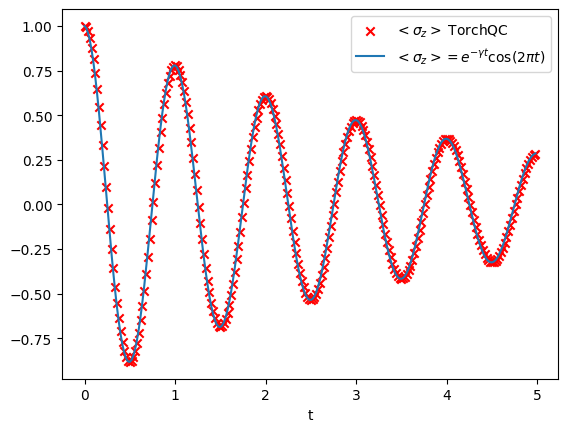

In [6]:
fig, ax = plt.subplots()

plt.scatter(time, Sz, c="r", marker="x", label=r"$<\sigma_z>$ TorchQC")
plt.plot(time, Sz_analytic, label=r"$<\sigma_z> = e^{-\gamma t} \cos(2 \pi t)$")
ax.set_xlabel('t')
ax.legend()

In [7]:
time_tensor, libland_states = lindblad_equation(rho, hamiltonian, time, Dt, [jump_operator], [gamma], method="adams4")
Sz = expect_val_dm(libland_states, sigmaZ())

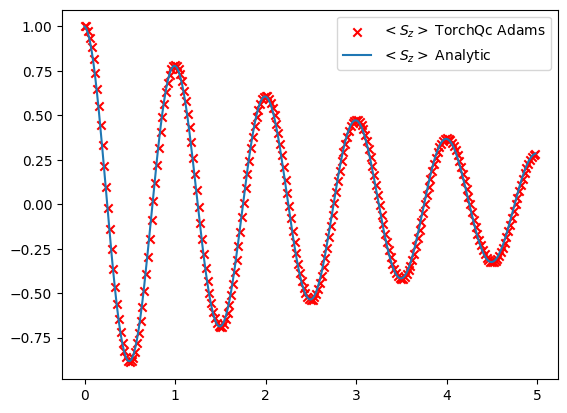

In [8]:
fig, ax = plt.subplots()

plt.scatter(time, Sz[:-1], c="r", marker="x", label=r"$<S_z>$ TorchQc Adams")
plt.plot(time, Sz_analytic, label=r"$<S_z>$ Analytic")
ax.legend()